In [24]:
true_labels= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

In [25]:
predicted_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted_labels, true_labels)

In [27]:
cm

array([[10,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10]])

Text(95.5815972222222, 0.5, 'True Class')

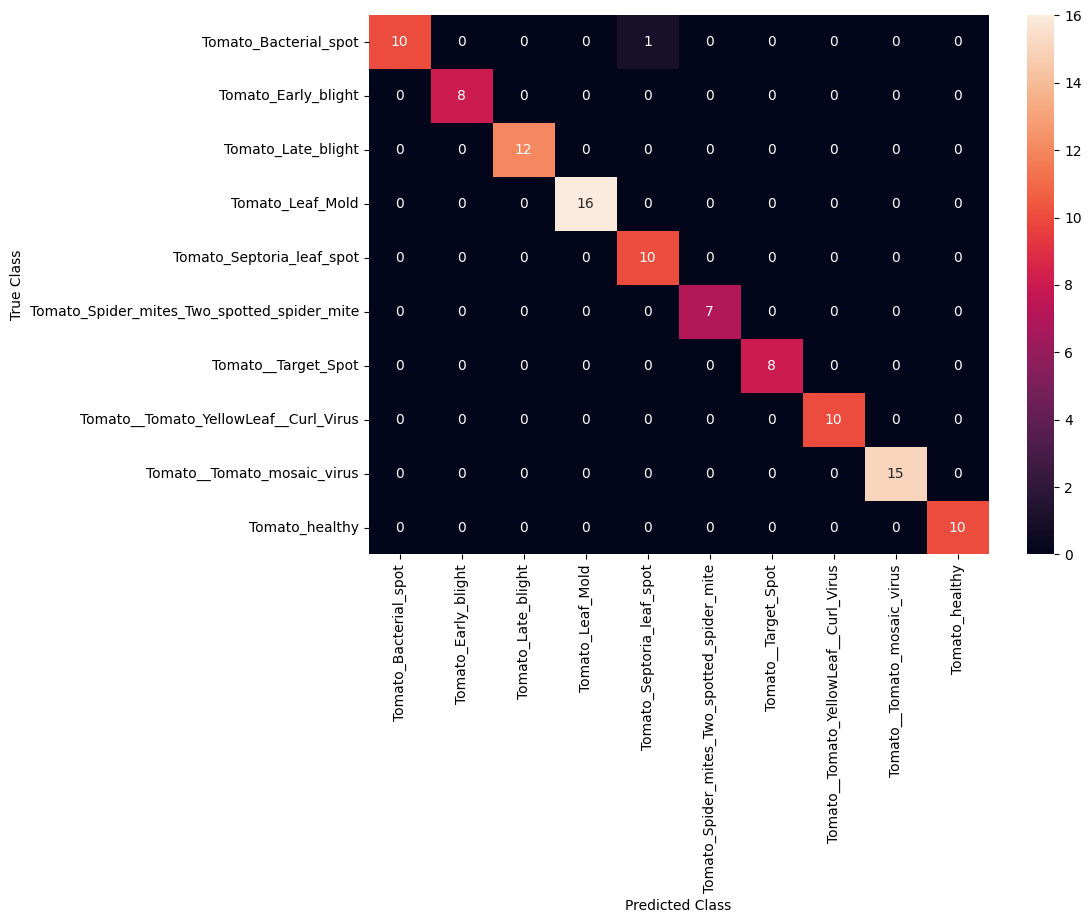

In [28]:
import matplotlib.pylab as plt
import seaborn as sn
labels = ['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Class')
plt.ylabel('True Class')

In [29]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')

print('Precision: ', precision)
print('Recall: ', recall)

l = len(true_labels)
acc = sum([predicted_labels[i] == true_labels[i] for i in range(l)]) / l
print('Accuracy: ', acc)

Precision:  0.990909090909091
Recall:  0.990909090909091
Accuracy:  0.9906542056074766


In [30]:
from sklearn.metrics import classification_report
print(classification_report(true_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        16
           4       1.00      0.91      0.95        11
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        10

    accuracy                           0.99       107
   macro avg       0.99      0.99      0.99       107
weighted avg       0.99      0.99      0.99       107



In [31]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy=",accuracy_score(true_labels,predicted_labels))
print("F1 Score=",f1_score(true_labels,predicted_labels, average="macro"))
print("Precision=",precision_score(true_labels,predicted_labels, average="macro"))
print("Recall=",recall_score(true_labels,predicted_labels, average="macro"))

Accuracy= 0.9906542056074766
F1 Score= 0.9904761904761905
Precision= 0.990909090909091
Recall= 0.990909090909091


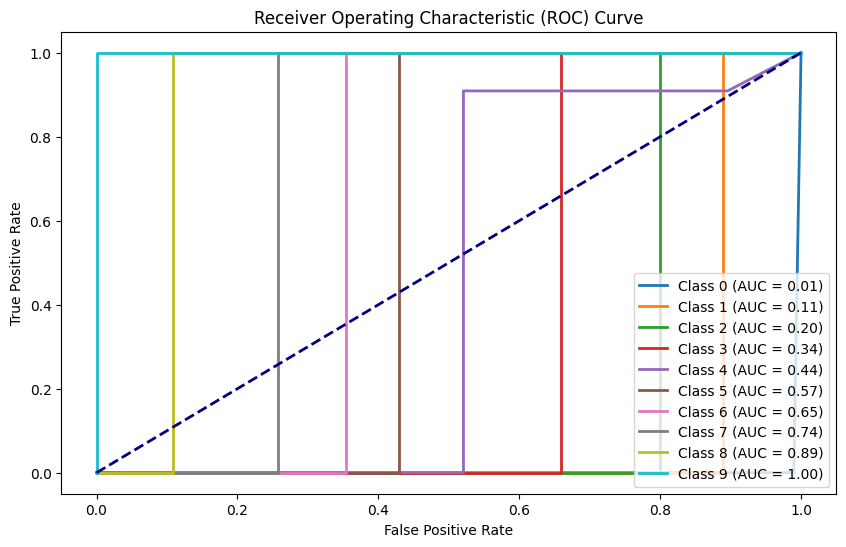

In [32]:
import matplotlib.pylab as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

num_classes = len(set(true_labels))

binarized_true_labels = label_binarize(true_labels, classes=list(range(num_classes)))

plt.figure(figsize=(10, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(binarized_true_labels[:, i], predicted_labels)

    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



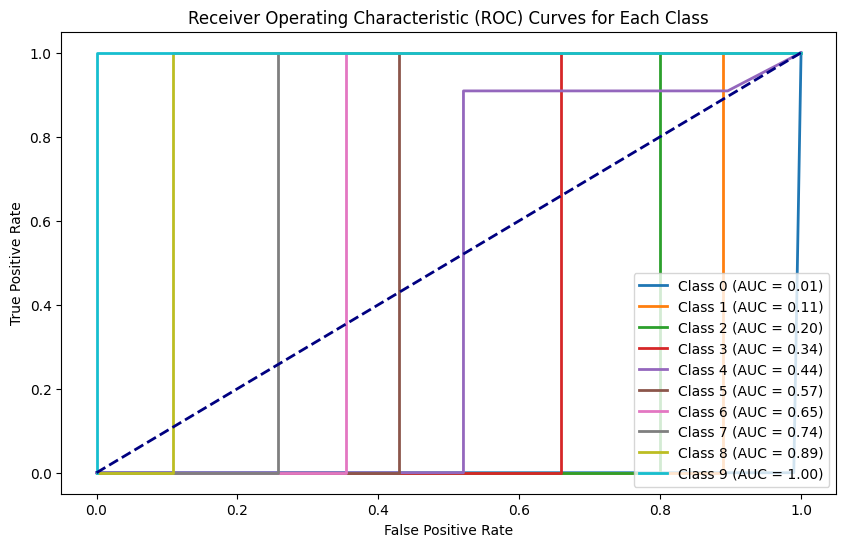

In [33]:
import matplotlib.pylab as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
num_classes = len(set(true_labels))

binarized_true_labels = label_binarize(true_labels, classes=list(range(num_classes)))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_true_labels[:, i], predicted_labels)  # Changed this line
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Each Class')
plt.legend(loc='lower right')
plt.show()

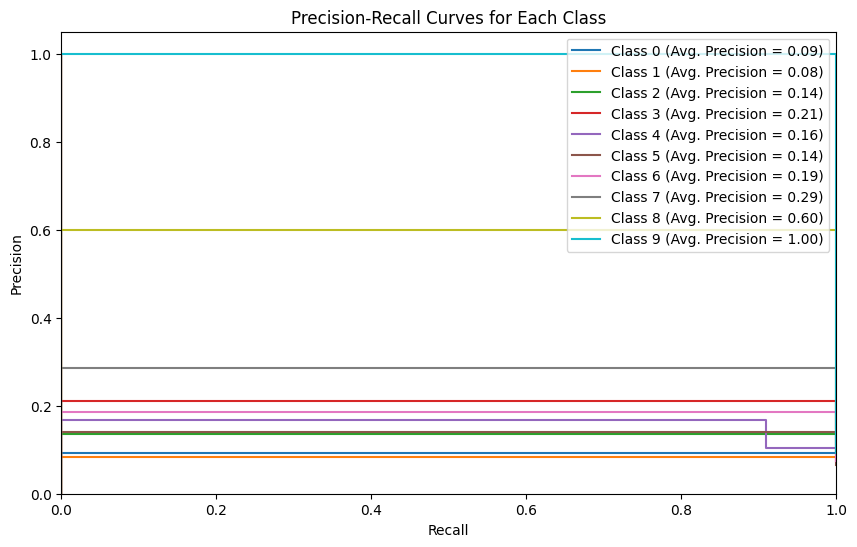

In [34]:
import matplotlib.pylab as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

num_classes = len(set(true_labels))

binarized_true_labels = label_binarize(true_labels, classes=list(range(num_classes)))

precision = dict()
recall = dict()
average_precision = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(
        binarized_true_labels[:, i], predicted_labels
    )
    average_precision[i] = average_precision_score(
        binarized_true_labels[:, i], predicted_labels
    )

plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.step(
        recall[i],
        precision[i],
        where="post",
        label=f"Class {i} (Avg. Precision = {average_precision[i]:.2f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Precision-Recall Curves for Each Class")
plt.legend(loc="upper right")
plt.show()

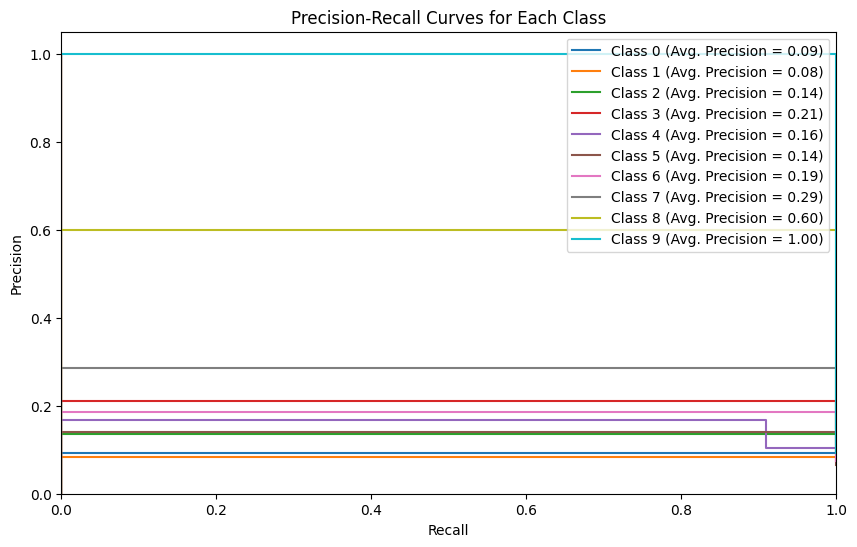

In [35]:
import matplotlib.pylab as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
num_classes = len(set(true_labels))
binarized_true_labels = label_binarize(true_labels, classes=list(range(num_classes)))

precision = dict()
recall = dict()
average_precision = dict()
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(
        binarized_true_labels[:, i], predicted_labels
    )
    average_precision[i] = average_precision_score(
        binarized_true_labels[:, i], predicted_labels
    )

plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.step(
        recall[i],
        precision[i],
        where="post",
        label=f"Class {i} (Avg. Precision = {average_precision[i]:.2f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Precision-Recall Curves for Each Class")
plt.legend(loc="upper right")
plt.show()

In [36]:
acc= [0.21848739683628082,
 0.5198079347610474,
 0.7695078253746033,
 0.8019207715988159,
 0.8595438003540039,
 0.9291716814041138,
 0.9267706871032715,
 0.9327731132507324,
 0.9387755393981934,
 0.9603841304779053,
 0.9651860594749451,
 0.9735894203186035,
 0.9783913493156433,
 0.9831932783126831,
 0.9831932783126831,
 0.9879952073097229,
 0.9951980710029602,
 0.9843937754631042,
 0.9855942130088806,
 0.9831932783126831,
 0.9903961420059204,
 0.9903961420059204,
 0.9855942130088806,
 0.9855942130088806,
 0.9915966391563416,
 0.9879952073097229,
 0.9867947101593018,
 0.9915966391563416,
 0.9939975738525391,
 0.9903961420059204,
 0.9939975738525391,
 0.9939975738525391,
 0.989195704460144,
 0.9927971363067627,
 0.9939975738525391,
 0.9903961420059204,
 0.9951980710029602,
 0.9879952073097229,
 0.9939975738525391,
 0.9951980710029602,
 0.9855942130088806,
 0.9951980710029602,
 0.9939975738525391,
 0.9915966391563416,
 0.9915966391563416,
 0.9939975738525391,
 0.9963985681533813,
 0.9963985681533813,
 0.9975990653038025,
 0.9939975738525391]

In [37]:
val_acc=[0.09345794469118118,
 0.4579439163208008,
 0.5327102541923523,
 0.7570093274116516,
 0.8130841255187988,
 0.8504672646522522,
 0.8598130941390991,
 0.8785046935081482,
 0.9158878326416016,
 0.8971962332725525,
 0.9065420627593994,
 0.8504672646522522,
 0.9252336621284485,
 0.9158878326416016,
 0.9158878326416016,
 0.9065420627593994,
 0.8878504633903503,
 0.9158878326416016,
 0.8971962332725525,
 0.9345794320106506,
 0.9532710313796997,
 0.9252336621284485,
 0.9439252614974976,
 0.9439252614974976,
 0.9345794320106506,
 0.9439252614974976,
 0.9345794320106506,
 0.9158878326416016,
 0.9439252614974976,
 0.9439252614974976,
 0.9345794320106506,
 0.9252336621284485,
 0.9439252614974976,
 0.9345794320106506,
 0.9252336621284485,
 0.9252336621284485,
 0.8971962332725525,
 0.8971962332725525,
 0.9439252614974976,
 0.9252336621284485,
 0.9345794320106506,
 0.9532710313796997,
 0.9439252614974976,
 0.9345794320106506,
 0.9626168012619019,
 0.9345794320106506,
 0.9532710313796997,
 0.9626168012619019,
 0.9252336621284485,
 0.9252336621284485]

In [38]:
loss=[2.1959240436553955,
 1.5198194980621338,
 0.9114562273025513,
 0.6462147235870361,
 0.4805232584476471,
 0.27611157298088074,
 0.27675291895866394,
 0.2357633113861084,
 0.21184448897838593,
 0.16009825468063354,
 0.12765954434871674,
 0.10664746910333633,
 0.11062771081924438,
 0.08426821976900101,
 0.07813078910112381,
 0.06160588935017586,
 0.04924065247178078,
 0.06546706706285477,
 0.06695616990327835,
 0.07477474957704544,
 0.04627225175499916,
 0.05106443911790848,
 0.05111551284790039,
 0.054573312401771545,
 0.04202478751540184,
 0.03832682967185974,
 0.04555392265319824,
 0.03372088819742203,
 0.028831008821725845,
 0.03598364442586899,
 0.026120297610759735,
 0.027409086003899574,
 0.04274677857756615,
 0.03489818423986435,
 0.02953038178384304,
 0.03015676885843277,
 0.02656434290111065,
 0.03723103180527687,
 0.024496085941791534,
 0.024317698553204536,
 0.041243843734264374,
 0.025614984333515167,
 0.02247314155101776,
 0.024386849254369736,
 0.03627358004450798,
 0.022829215973615646,
 0.01810421422123909,
 0.016560755670070648,
 0.0204432662576437,
 0.024566851556301117]

In [39]:
val_loss=[2.3398897647857666,
 1.5716848373413086,
 1.280161738395691,
 0.8021593689918518,
 0.5984416007995605,
 0.529855489730835,
 0.4133606553077698,
 0.38151684403419495,
 0.30822789669036865,
 0.3725692629814148,
 0.3047723174095154,
 0.33930063247680664,
 0.27784743905067444,
 0.28466087579727173,
 0.2561335563659668,
 0.3173758387565613,
 0.36258992552757263,
 0.30534523725509644,
 0.3965223431587219,
 0.22356444597244263,
 0.2148919254541397,
 0.2375454604625702,
 0.2141587734222412,
 0.23182269930839539,
 0.20000186562538147,
 0.25675442814826965,
 0.24722972512245178,
 0.2612478733062744,
 0.22151748836040497,
 0.2619563937187195,
 0.21803392469882965,
 0.251578152179718,
 0.24037598073482513,
 0.2404598593711853,
 0.29923316836357117,
 0.2431854009628296,
 0.31632208824157715,
 0.27833250164985657,
 0.20905102789402008,
 0.27372971177101135,
 0.2746034264564514,
 0.22216123342514038,
 0.21640171110630035,
 0.18532486259937286,
 0.18555673956871033,
 0.18727490305900574,
 0.14948971569538116,
 0.16363787651062012,
 0.16147775948047638,
 0.2271513193845749]

In [40]:
EPOCHS=50

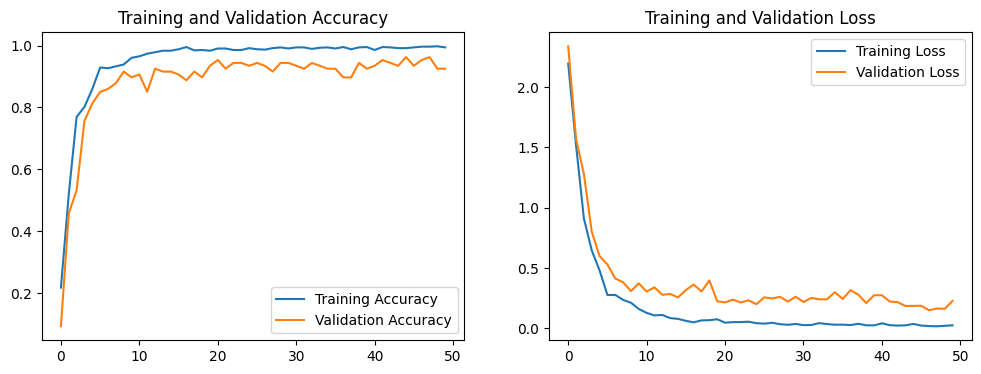

In [41]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()